In [1]:
%matplotlib inline

In [2]:
import tensorflow as tf
import pandas as pd

from os.path import expanduser

#SRC_PATH = expanduser("~") + '/SageMaker/mastering-ml-on-aws/chapter3/'


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

training_df = pd.read_csv('s3://my-jp-aws/linearmodels/train/training-CICIDS2017_2.csv', header=None, 
                          names = ['Label','Destination.Port', 'Flow.Duration', 'Total.Fwd.Packets', 'Total.Backward.Packets', 
                       'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max', 
                       'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std', 
                       'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 
                       'Flow.Bytes.s', 'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min', 
                       'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 
                       'Bwd.IAT.Mean', 'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags', 'Bwd.PSH.Flags',
                       'Fwd.URG.Flags', 'Bwd.URG.Flags', 'Fwd.Header.Length', 'Bwd.Header.Length', 'Fwd.Packets.s', 
                       'Bwd.Packets.s', 'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean', 'Packet.Length.Std', 
                       'Packet.Length.Variance', 'FIN.Flag.Count', 'SYN.Flag.Count', 'RST.Flag.Count', 'PSH.Flag.Count', 
                       'ACK.Flag.Count', 'URG.Flag.Count', 'CWE.Flag.Count', 'ECE.Flag.Count', 'Down.Up.Ratio', 
                       'Average.Packet.Size', 'Avg.Fwd.Segment.Size', 'Avg.Bwd.Segment.Size', 'Fwd.Header.Length.1', 
                       'Fwd.Avg.Bytes.Bulk', 'Fwd.Avg.Packets.Bulk', 'Fwd.Avg.Bulk.Rate', 'Bwd.Avg.Bytes.Bulk', 
                       'Bwd.Avg.Packets.Bulk', 'Bwd.Avg.Bulk.Rate', 'Subflow.Fwd.Packets', 'Subflow.Fwd.Bytes', 
                       'Subflow.Bwd.Packets', 'Subflow.Bwd.Bytes', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 
                       'act_data_pkt_fwd', 'min_seg_size_forward', 'Active.Mean', 'Active.Std', 'Active.Max', 
                       'Active.Min', 'Idle.Mean', 'Idle.Std', 'Idle.Max', 'Idle.Min'])


training_df.head()

Label  Destination.Port  Flow.Duration  Total.Fwd.Packets  \
0      0               123          99947                  1   
1      0               443           3085                  1   
2      0                53          30498                  1   
3      0                53            180                  2   
4      0                53          31190                  4   

   Total.Backward.Packets  Total.Length.of.Fwd.Packets  \
0                       1                           48   
1                       2                            6   
2                       1                           60   
3                       2                           82   
4                       2                          164   

   Total.Length.of.Bwd.Packets  Fwd.Packet.Length.Max  Fwd.Packet.Length.Min  \
0                           48                     48                     48   
1                           44                      6                      6   
2                           88                     60                     60   
3                          152                     41                     41   
4                          152                     41                     41   

   Fwd.Packet.Length.Mean  ...  act_data_pkt_fwd  min_seg_size_forward  \
0                    48.0  ...                 0                    40   
1                     6.0  ...                 0                    20   
2                    60.0  ...                 0                    32   
3                    41.0  ...                 1                    32   
4                    41.0  ...                 3                    32   

   Active.Mean  Active.Std  Active.Max  Active.Min  Idle.Mean  Idle.Std  \
0          0.0         0.0           0           0        0.0       0.0   
1          0.0         0.0           0           0        0.0       0.0   
2          0.0         0.0           0           0        0.0       0.0   
3          0.0         0.0           0           0        0.0       0.0   
4          0.0         0.0           0           0        0.0       0.0   

   Idle.Max  Idle.Min  
0         0         0  
1         0         0  
2         0         0  
3         0         0  
4         0         0  

[5 rows x 79 columns]

In [4]:
training_features = ['Destination.Port', 'Flow.Duration', 'Total.Fwd.Packets', 'Total.Backward.Packets', 
                       'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max', 
                       'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std', 
                       'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 
                       'Flow.Bytes.s', 'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min', 
                       'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 
                       'Bwd.IAT.Mean', 'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags', 'Bwd.PSH.Flags',
                       'Fwd.URG.Flags', 'Bwd.URG.Flags', 'Fwd.Header.Length', 'Bwd.Header.Length', 'Fwd.Packets.s', 
                       'Bwd.Packets.s', 'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean', 'Packet.Length.Std', 
                       'Packet.Length.Variance', 'FIN.Flag.Count', 'SYN.Flag.Count', 'RST.Flag.Count', 'PSH.Flag.Count', 
                       'ACK.Flag.Count', 'URG.Flag.Count', 'CWE.Flag.Count', 'ECE.Flag.Count', 'Down.Up.Ratio', 
                       'Average.Packet.Size', 'Avg.Fwd.Segment.Size', 'Avg.Bwd.Segment.Size', 'Fwd.Header.Length.1', 
                       'Fwd.Avg.Bytes.Bulk', 'Fwd.Avg.Packets.Bulk', 'Fwd.Avg.Bulk.Rate', 'Bwd.Avg.Bytes.Bulk', 
                       'Bwd.Avg.Packets.Bulk', 'Bwd.Avg.Bulk.Rate', 'Subflow.Fwd.Packets', 'Subflow.Fwd.Bytes', 
                       'Subflow.Bwd.Packets', 'Subflow.Bwd.Bytes', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 
                       'act_data_pkt_fwd', 'min_seg_size_forward', 'Active.Mean', 'Active.Std', 'Active.Max', 
                       'Active.Min', 'Idle.Mean', 'Idle.Std', 'Idle.Max', 'Idle.Min']
label = 'Label'

In [5]:
tf_regressor = tf.estimator.LinearClassifier(feature_columns=[tf.feature_column.numeric_column('inputs', shape=(78,))], 
                                             optimizer=tf.train.FtrlOptimizer(learning_rate=0.1, 
                                                                              l1_regularization_strength=0.001))


W0923 08:29:49.357025 140636184655680 estimator.py:1811] Using temporary folder as model directory: /tmp/tmpuej2a2sr


In [6]:
training_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'inputs': training_df[training_features].values},
    y=training_df[label].as_matrix(),
    shuffle=False,
    batch_size=10000,
    num_epochs=100,
    queue_capacity=1000,
    num_threads=1)


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [7]:
tf_regressor.train(input_fn=training_input_fn, steps=50000)


W0923 08:30:03.103757 140636184655680 deprecation.py:323] From /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/training/training_util.py:236: Variable.initialized_value (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
W0923 08:30:03.119513 140636184655680 deprecation.py:323] From /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tensorflow_estimator/python/estimator/inputs/queues/feeding_queue_runner.py:62: QueueRunner.__init__ (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
W0923 08:30:03.121922 140636184655680 deprecation.py:323] From /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/pyth

In [31]:
testing_df = pd.read_csv('s3://my-jp-aws/linearmodels/Evaluation/testing-CICIDS2017_2-actual.csv', header=0, 
                          names = ['Label','Destination.Port', 'Flow.Duration', 'Total.Fwd.Packets', 'Total.Backward.Packets', 
                       'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max', 
                       'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std', 
                       'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 
                       'Flow.Bytes.s', 'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min', 
                       'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 
                       'Bwd.IAT.Mean', 'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags', 'Bwd.PSH.Flags',
                       'Fwd.URG.Flags', 'Bwd.URG.Flags', 'Fwd.Header.Length', 'Bwd.Header.Length', 'Fwd.Packets.s', 
                       'Bwd.Packets.s', 'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean', 'Packet.Length.Std', 
                       'Packet.Length.Variance', 'FIN.Flag.Count', 'SYN.Flag.Count', 'RST.Flag.Count', 'PSH.Flag.Count', 
                       'ACK.Flag.Count', 'URG.Flag.Count', 'CWE.Flag.Count', 'ECE.Flag.Count', 'Down.Up.Ratio', 
                       'Average.Packet.Size', 'Avg.Fwd.Segment.Size', 'Avg.Bwd.Segment.Size', 'Fwd.Header.Length.1', 
                       'Fwd.Avg.Bytes.Bulk', 'Fwd.Avg.Packets.Bulk', 'Fwd.Avg.Bulk.Rate', 'Bwd.Avg.Bytes.Bulk', 
                       'Bwd.Avg.Packets.Bulk', 'Bwd.Avg.Bulk.Rate', 'Subflow.Fwd.Packets', 'Subflow.Fwd.Bytes', 
                       'Subflow.Bwd.Packets', 'Subflow.Bwd.Bytes', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 
                       'act_data_pkt_fwd', 'min_seg_size_forward', 'Active.Mean', 'Active.Std', 'Active.Max', 
                       'Active.Min', 'Idle.Mean', 'Idle.Std', 'Idle.Max', 'Idle.Min'])
testing_df.head()

Label  Destination.Port  Flow.Duration  Total.Fwd.Packets  \
0      0               123          99947                  1   
1      0               443           3085                  1   
2      0                53          30498                  1   
3      0                53            180                  2   
4      0                53          31190                  4   

   Total.Backward.Packets  Total.Length.of.Fwd.Packets  \
0                       1                           48   
1                       2                            6   
2                       1                           60   
3                       2                           82   
4                       2                          164   

   Total.Length.of.Bwd.Packets  Fwd.Packet.Length.Max  Fwd.Packet.Length.Min  \
0                           48                     48                     48   
1                           44                      6                      6   
2                           88                     60                     60   
3                          152                     41                     41   
4                          152                     41                     41   

   Fwd.Packet.Length.Mean  ...  act_data_pkt_fwd  min_seg_size_forward  \
0                    48.0  ...                 0                    40   
1                     6.0  ...                 0                    20   
2                    60.0  ...                 0                    32   
3                    41.0  ...                 1                    32   
4                    41.0  ...                 3                    32   

   Active.Mean  Active.Std  Active.Max  Active.Min  Idle.Mean  Idle.Std  \
0          0.0         0.0           0           0        0.0       0.0   
1          0.0         0.0           0           0        0.0       0.0   
2          0.0         0.0           0           0        0.0       0.0   
3          0.0         0.0           0           0        0.0       0.0   
4          0.0         0.0           0           0        0.0       0.0   

   Idle.Max  Idle.Min  
0         0         0  
1         0         0  
2         0         0  
3         0         0  
4         0         0  

[5 rows x 79 columns]

In [32]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'inputs': testing_df[training_features].values},
    y=testing_df[label].as_matrix(),
    shuffle=False,
    batch_size=1)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


In [33]:
tf_regressor.evaluate(input_fn=test_input_fn)
#{'accuracy': 0.97491723,
# 'accuracy_baseline': 0.8108967,
# 'auc': 0.96555537,
# 'auc_precision_recall': 0.9398676,
# 'average_loss': 532.92786,
# 'label/mean': 0.18910329,
# 'loss': 532.92786,
# 'precision': 0.9197173,
# 'prediction/mean': 0.1953866,
# 'recall': 0.950313,
# 'global_step': 5475}

W0923 09:20:47.303987 140636184655680 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.
W0923 09:20:47.327014 140636184655680 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.


{'accuracy': 0.97491723,
 'accuracy_baseline': 0.8108967,
 'auc': 0.96555537,
 'auc_precision_recall': 0.9398676,
 'average_loss': 532.92786,
 'label/mean': 0.18910329,
 'loss': 532.92786,
 'precision': 0.9197173,
 'prediction/mean': 0.1953866,
 'recall': 0.950313,
 'global_step': 5475}

In [34]:
predictions = tf_regressor.predict(input_fn=test_input_fn)


In [35]:
predicted_values = [prediction['classes'][0].decode('utf-8') for prediction in predictions]


In [36]:
predicted_values[:5]


['0', '0', '0', '0', '0']

In [37]:
len(testing_df)


136867

In [38]:
len(predicted_values)


136867

In [39]:
testing_df['prediction'] = pd.to_numeric(predicted_values)


In [40]:
testing_df.head()


Label  Destination.Port  Flow.Duration  Total.Fwd.Packets  \
0      0               123          99947                  1   
1      0               443           3085                  1   
2      0                53          30498                  1   
3      0                53            180                  2   
4      0                53          31190                  4   

   Total.Backward.Packets  Total.Length.of.Fwd.Packets  \
0                       1                           48   
1                       2                            6   
2                       1                           60   
3                       2                           82   
4                       2                          164   

   Total.Length.of.Bwd.Packets  Fwd.Packet.Length.Max  Fwd.Packet.Length.Min  \
0                           48                     48                     48   
1                           44                      6                      6   
2                           88                     60                     60   
3                          152                     41                     41   
4                          152                     41                     41   

   Fwd.Packet.Length.Mean  ...  min_seg_size_forward  Active.Mean  Active.Std  \
0                    48.0  ...                    40          0.0         0.0   
1                     6.0  ...                    20          0.0         0.0   
2                    60.0  ...                    32          0.0         0.0   
3                    41.0  ...                    32          0.0         0.0   
4                    41.0  ...                    32          0.0         0.0   

   Active.Max  Active.Min  Idle.Mean  Idle.Std  Idle.Max  Idle.Min  prediction  
0           0           0        0.0       0.0         0         0           0  
1           0           0        0.0       0.0         0         0           0  
2           0           0        0.0       0.0         0         0           0  
3           0           0        0.0       0.0         0         0           0  
4           0           0        0.0       0.0         0         0           0  

[5 rows x 80 columns]

In [41]:
from sklearn.metrics import confusion_matrix

confusion_matrix(testing_df['Label'], testing_df['prediction'], labels =[0, 1] )


array([[108838,   2147],
       [  1286,  24596]])

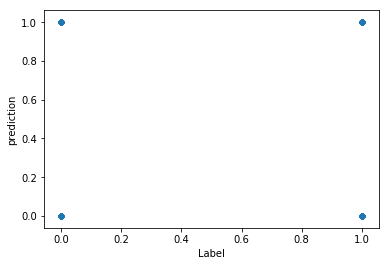

In [19]:
testing_df.plot(kind='scatter', x=label, y='prediction')
